<a href="https://colab.research.google.com/github/JinGunseon/MachineLearning/blob/main/InterestRateExpectation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print("CUDA Available:",torch.cuda.is_available())

CUDA Available: True



```torch.cuda.is_available()``` 는 PyTorch에서 GPU(CUDA)를 사용할 수 있는지 확인하는 함수이다.



In [5]:
import requests
import pandas as pd

# 한국은행 ECOS API 키
API_KEY=""

# 기준금리 데이터 요청 URL
url = f"https://ecos.bok.or.kr/api/StatisticSearch/{API_KEY}/json/en/1/100/722Y001/M/200001/202512"

# 데이터 요청 및 json 변환
response = requests.get(url)
data = response.json()

items = data['StatisticSearch']['row']
df = pd.DataFrame(items)[['TIME','DATA_VALUE']]
df.columns = ['Date', 'Interest Rate']
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m');
df = df.sort_values('Date')

# 데이터 확인
print("한국은행 기준금리 데이터")
display(df)

한국은행 기준금리 데이터


,Date,Interest Rate
0,2000-01-01,4.75
1,2000-01-01,5
2,2000-01-01,3
3,2000-02-01,5
4,2000-02-01,5
...,...,...
95,2002-08-01,2.5
97,2002-09-01,5
98,2002-09-01,2.5
96,2002-09-01,4.25


RMSE:  1.1018320218344404


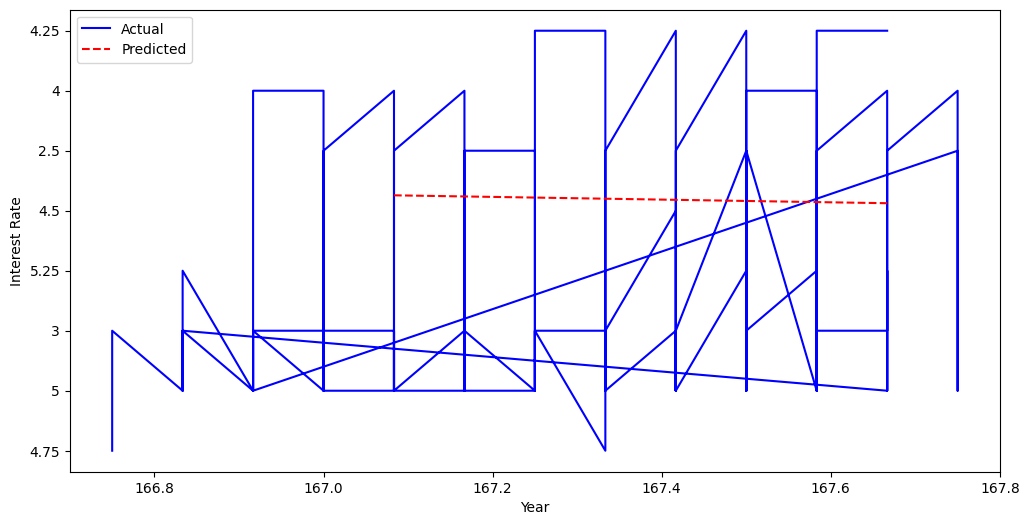

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error

# 데이터 전처리
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Time'] = (df['Year']+df['Month'])/12 # 연도+월을 정규화

X = df[['Time']]
y = df['Interest Rate']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
print("RMSE: ",rmse)

# 시각화
plt.figure(figsize=(12,6))
plt.plot(df['Time'], df['Interest Rate'], label='Actual', color = 'blue')
plt.plot(X_test, y_pred, label='Predicted', linestyle='dashed', color = 'red')

plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()